# Table of contents
1. [Data Description](#datadescription)
2. [Loading Compressed Data](#loadingcompresseddata)
3. [Error Handling](#error_handling)
4. [Analyse Raw Data](#analyse_raw_data)
5. [Explore Data](#explore_data)
6. [Summarize](#summarize)
7. [Summarize and Plot](#summarize_plot)

### 1. Data Description <a name ="datadescription" id="datadescription"></a>

#### Data Source

The data we use in this notebook is released by the Kanton of Basel-Stadt and lists fines adminstered in the public space.

We will make use of this dataset to get some hands-on experience regarding data loading and exploration based on dataframes and pandas.

https://opendata.swiss/de/dataset/ordnungsbussen provides some limited information about the dataset.

### 2. Loading Compressed Data <a name ="loadingcompresseddata" id="loadingcompresseddata"></a>

The code in the cell below allows you to load data from the file. 
For a cleaner set up we store the location of the file in the data_path variable.

Lets see what happens when we execute the code in the cell below.

***Exercise: Execute the code cell below***

In [45]:
import pandas as pd
# this is the path to the data file
data_path = "../data/Fines_Basel_Stadt_Oct_2023.csv.gz"
# this is the standard call without configuration to read_csv()
df = pd.read_csv(data_path, sep=";")

### 3. Error Handling <a name ="error_handling" id="error_handling"></a>

When you run the cell above it will cause an error.

The error message might not be immediately useful to identify what went wrong. 
At this point we have generally two options:
- ***Search***: We can do a web search or chatbot search based on the error message. 
- ***Dig into Data***: Alternatively or in combination with the search we can analyse the data we tried to load

* ***Exercise 1: Use ChatGPT or Search based on the error message as a starting point to see what went wrong.*** 
* ***Exercise 2: The code cell below provides you with a start for printing the content of the file. Make use of it in order to analyse the raw data.***


In [46]:
# we import the gzip module. gzip is a module focused on handling compressed files in the 'gz' format
import gzip

# with is the way to open a file in python that ensures it automatically closes the file after use
with gzip.open(data_path,'rt') as input_file:
    # we iterate from 0 to 9 and print the line each time. That way we print the first ten lines of the input_file
    for i in range(10):
        print(input_file.readline())
   

laufnummer;kategorie_bezeichnung;wochentag;ubertretungswochentagnummer;ubertretungswochentag;ubertretungsmonat;ubertretungsjahr;gk_limite;u_ort_plz;u_ort_ort;bussen_betrag;buzi;buzi_zus;buzi_text

930002;Fussgänger;5 Donnerstag;5;Donnerstag;1;2021;;4001;Basel;100;2.5;;Strassenmusizieren an verbotenem Ort und/oder zu verbotener Zeit trotz behördlicher Mahnung

930003;Personenwagen;5 Donnerstag;5;Donnerstag;1;2021;;4057;Basel;120;241.1;A;Parkieren auf einer Halteverbotslinie bis 60 Minuten

930005;Personenwagen;5 Donnerstag;5;Donnerstag;1;2021;;4057;Basel;40;200.a;B;Überschreiten der zulässigen Parkzeit bis 2 Stunden in der Blauen Zone

930009;Personenwagen;5 Donnerstag;5;Donnerstag;1;2021;;4053;Basel;40;203.2;;Ändern der eingestellten Ankunftszeit, ohne wegzufahren

930011;Personenwagen;5 Donnerstag;5;Donnerstag;1;2021;;4053;Basel;40;200.a;B;Überschreiten der zulässigen Parkzeit bis 2 Stunden in der Blauen Zone

930013;Personenwagen;5 Donnerstag;5;Donnerstag;1;2021;;4057;Basel;40;203.3;

### 4. Analyse Raw Data <a name ="analyse_raw_data" id="analyse_raw_data"></a>


Analyze the raw data file output above.
Solving these kind of problems usually requires us cross-check the raw data with the information that a search returned.

Here is a table that was generated by ChatGPT based on prompting with the error message. You can use the table below or your own search results to identify what possible cause applies to our data loading scenario.


| **Cause**                      | **Resolution**                                                         |
|--------------------------------|------------------------------------------------------------------------|
| Mismatched Column Count        | Check that the number of columns in the data matches the headers.    |
| Delimiter Mismatch             | Specify the delimiter using the `delimiter` or `sep` parameter.      |
| Quotation Marks                | Ensure values with commas are properly enclosed in quotation marks.  |
| Whitespace Issues              | Remove leading/trailing whitespaces from the data values.            |
| Data Errors                    | Inspect and correct any data formatting issues on the problematic line. |
| Header Rows                    | Verify that header rows don't contain extra delimiters.              |
| Encoding Issues                | Specify the correct encoding using the `encoding` parameter.         |
| File Corruption                | Check for file corruption by opening it with a text editor.          |


Use the next code cell to fix the data loading.

In [47]:
df = pd.read_csv(data_path, delimiter=";")
# This prints out the first ten lines of the dataframe, and can be used for a sanity check
df[:10]

,laufnummer,kategorie_bezeichnung,wochentag,ubertretungswochentagnummer,ubertretungswochentag,ubertretungsmonat,ubertretungsjahr,gk_limite,u_ort_plz,u_ort_ort,bussen_betrag,buzi,buzi_zus,buzi_text
0,930002,Fussgänger,5 Donnerstag,5,Donnerstag,1,2021,NaN,4001,Basel,100,2.5,NaN,Strassenmusizieren an verbotenem Ort und/oder ...
1,930003,Personenwagen,5 Donnerstag,5,Donnerstag,1,2021,NaN,4057,Basel,120,241.1,A,Parkieren auf einer Halteverbotslinie bis 60 M...
2,930005,Personenwagen,5 Donnerstag,5,Donnerstag,1,2021,NaN,4057,Basel,40,200.a,B,Überschreiten der zulässigen Parkzeit bis 2 St...
3,930009,Personenwagen,5 Donnerstag,5,Donnerstag,1,2021,NaN,4053,Basel,40,203.2,NaN,"Ändern der eingestellten Ankunftszeit, ohne we..."
4,930011,Personenwagen,5 Donnerstag,5,Donnerstag,1,2021,NaN,4053,Basel,40,200.a,B,Überschreiten der zulässigen Parkzeit bis 2 St...
5,930013,Personenwagen,5 Donnerstag,5,Donnerstag,1,2021,NaN,4057,Basel,40,203.3,NaN,Nichtingangsetzen der Parkuhr
6,930014,Personenwagen,5 Donnerstag,5,Donnerstag,1,2021,NaN,4052,Basel,40,200.a,B,Überschreiten der zulässigen Parkzeit bis 2 St...
7,930022,Personenwagen,5 Donnerstag,5,Donnerstag,1,2021,NaN,4057,Basel,40,202.1,A,Nichtanbringen der Parkscheibe am Fahrzeug
8,930031,Personenwagen,5 Donnerstag,5,Donnerstag,1,2021,NaN,4058,Basel,40,200.a,B,Überschreiten der zulässigen Parkzeit bis 2 St...
9,930032,Personenwagen,5 Donnerstag,5,Donnerstag,1,2021,NaN,4051,Basel,40,250.a,NaN,Parkieren innerhalb des signalisierten Parkver...


### 5. Explore the data <a name ="explore_data" id="explore_data"></a>

After fixing the data-loading we can now start to explore the data.

Your initial data exploration should be focused on identifying if the data loaded correctly.

#### Verification

To verify the data loading process we can check if:

- number of rows and columns matches the data file
- all data types are correctly loaded (this applies for example to the loading of date type data or numerical data)
- no encoding errors are present (do the characters look correct)

The following methods can be used to verify the data:

1. **[`head()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [`tail()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html)**:
   - Use `df.head()` and `df.tail()` to quickly inspect the first and last few rows of the DataFrame.

2. **[`info()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)**:
   - The `df.info()` method provides a summary of the DataFrame, including data types, non-null counts, and memory usage. It's valuable for understanding the data structure and identifying missing values.

3. **[`shape`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html)**:
   - The `df.shape` attribute gives you the number of rows and columns, allowing you to verify the size of the data.

4. **[`columns`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) and [`dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html)**:
   - Use `df.columns` to check column names and `df.dtypes` to verify data types. This helps ensure that the columns are correctly labeled and typed.

5. **[`isnull()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html)**:
   - `df.isnull()` and `df.isna()` provide Boolean values to indicate missing data. This is essential for detecting missing or incomplete records. You can use the `df.isnull().all()` and df.`df.isnull.any()` and `df.isnull.sum()` methods to summarize the observations.  

6. **[`duplicated()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html)**:
   - `df.duplicated()` allows you to identify duplicated rows, which may need to be addressed or removed.

You can click on the links to access the official Pandas documentation for each method or attribute to learn more about their usage and parameters.

***Exercise: Use the following code cell to apply the methods above to inspect the dataframe.***

In [48]:
df.duplicated()
df[df.duplicated()]

df.isnull().all() # Checks all columns for null, if all values are null the col is true
df.isnull().any() # Checks all columns for null, if one value in the col is null the col is true
df.isnull().sum() # Sums all null values in each col

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500357 entries, 0 to 1500356
Data columns (total 14 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   laufnummer                   1500357 non-null  int64  
 1   kategorie_bezeichnung        1500357 non-null  object 
 2   wochentag                    1500357 non-null  object 
 3   ubertretungswochentagnummer  1500357 non-null  int64  
 4   ubertretungswochentag        1500357 non-null  object 
 5   ubertretungsmonat            1500357 non-null  int64  
 6   ubertretungsjahr             1500357 non-null  int64  
 7   gk_limite                    591890 non-null   float64
 8   u_ort_plz                    1500357 non-null  int64  
 9   u_ort_ort                    1500355 non-null  object 
 10  bussen_betrag                1500357 non-null  int64  
 11  buzi                         1500357 non-null  object 
 12  buzi_zus                     950163 non-nu

,laufnummer,ubertretungswochentagnummer,ubertretungsmonat,ubertretungsjahr,gk_limite,u_ort_plz,bussen_betrag
count,1.500357e+06,1.500357e+06,1.500357e+06,1.500357e+06,591890.000000,1.500357e+06,1.500357e+06
mean,7.501799e+05,4.275223e+00,6.196320e+00,2.019818e+03,53.724037,4.053298e+03,6.091058e+01
std,4.331160e+05,1.884771e+00,3.439307e+00,1.878533e+00,20.377588,1.509747e+02,4.779710e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,2.017000e+03,20.000000,-1.000000e+00,1.000000e+01
25%,3.750910e+05,3.000000e+00,3.000000e+00,2.018000e+03,30.000000,4.052000e+03,4.000000e+01
50%,7.501800e+05,4.000000e+00,6.000000e+00,2.020000e+03,50.000000,4.056000e+03,4.000000e+01
75%,1.125269e+06,6.000000e+00,9.000000e+00,2.021000e+03,80.000000,4.058000e+03,6.000000e+01
max,1.500358e+06,7.000000e+00,1.200000e+01,2.023000e+03,80.000000,4.126000e+03,2.600000e+02


### 6. Summarize <a name ="summarize" id="summarize"></a>

Next to the methods for verification we also have methods that support getting the hang of the data by summarizing the information contained in the dataset.
From a professional perspective these summarizations can sometimes provide hints at underlying data errors and data loading errors that might otherwise escape your notice.
Primarily they are your entry towards understanding also the distribution of values contained in the dataset.

1. [`df.info()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html): Provides a concise summary of the DataFrame's data types and non-null values.

2. [`df.describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html): Generates descriptive statistics (count, mean, std, min, max, etc.) for numeric columns.

The first call `info()` can be used to quickly get a glance at the completeness of the dataset (how many values are presents for each column).
The second gives us a quick indication of the distribution of values.

***Exercise: Use the cell below to analyse the dataframe using the methods above***

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500357 entries, 0 to 1500356
Data columns (total 14 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   laufnummer                   1500357 non-null  int64  
 1   kategorie_bezeichnung        1500357 non-null  object 
 2   wochentag                    1500357 non-null  object 
 3   ubertretungswochentagnummer  1500357 non-null  int64  
 4   ubertretungswochentag        1500357 non-null  object 
 5   ubertretungsmonat            1500357 non-null  int64  
 6   ubertretungsjahr             1500357 non-null  int64  
 7   gk_limite                    591890 non-null   float64
 8   u_ort_plz                    1500357 non-null  int64  
 9   u_ort_ort                    1500355 non-null  object 
 10  bussen_betrag                1500357 non-null  int64  
 11  buzi                         1500357 non-null  object 
 12  buzi_zus                     950163 non-nu

### 7. Summarize and Plot <a name ="summarize_plot" id="summarize_plot"></a>



In order to start to summarize and plot the data in the dataframe we can make use of the `value_counts()` function. It can be used to count the number of unique values per column.

***Frequency of Unique Values***

`value_counts()`: Count Unique Values

Use `value_counts()` to count unique values in a DataFrame column.

```python
df['column_name'].value_counts()
```
You can use the following parameters to configure the behavior of the method:

- `normalize`: If True, returns relative frequencies (percentages).
- `sort`: Sorts results by counts (default).
- `ascending`: Sort in ascending order.
- `dropna`: Includes NaN values (default).

***Sorting***

Sorting Methods

Pandas provides sorting methods for DataFrames.

1. `sort_values()`: Sort by Column Values

```python
df.sort_values(by='column_name', ascending=True)
```

2. `sort_index()`: Sort by Row/Index Labels

```python
df.sort_index(axis=0, level=None, ascending=True)
```

- `by`: Column name(s) to sort by.
- `ascending`: Sort in ascending order (default).
- `inplace`: Sort in place (default is False).

Example (Sorting by Column Values):

```python
sorted_df = df.sort_values(by='Category', ascending=True)
print(sorted_df)
```


***Plotting with Pandas***

As seen in the last notebook we can use the `plot()` method in combination with dataframes.

**Example (Bar Plot):**

```python
import matplotlib.pyplot as plt

# Count unique values and create a bar plot
value_counts = df['Category'].value_counts()
value_counts.plot(kind='bar', title='Value Counts')

plt.xlabel('Category')
plt.ylabel('Count')
plt.show()
```

This can be applied to the current example by running the line below:


```python
df.bussen_betrag.value_counts().sort_index().plot(kind="bar")
```

***Exercise: Use the groupBy() method and the above code to expand the plotting based analysis of the data. Below code snippet will help you to get started.*** 
```python
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame
data = {
    'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'A', 'C'],
    'Value': [10, 20, 30, 40, 50, 60, 70, 80]
}
df = pd.DataFrame(data)

# Group by 'Category' and count unique values in 'Value' for each category
grouped_counts = df.groupby('Category')['Value'].value_counts()

# Reset the index to make the grouped data accessible for plotting
grouped_counts = grouped_counts.reset_index(name='Count')

# Plot the grouped counts as a bar plot
plt.figure(figsize=(8, 6))
plt.bar(grouped_counts['Value'], grouped_counts['Count'])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Value Counts by Category')
plt.show()
```


<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  

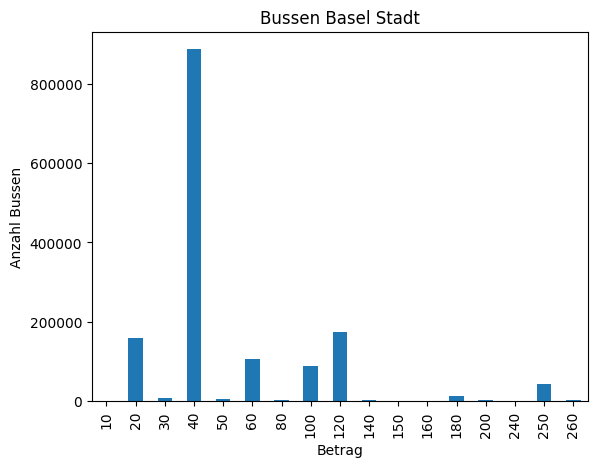

In [50]:
# df.u_ort_plz.value_counts().sort_index().plot(kind="bar")

import matplotlib.pyplot as plt

# Count unique values and create a bar plot
value_counts = df['bussen_betrag'].value_counts().sort_index()
value_counts.plot(kind='bar', title='Bussen Basel Stadt')

plt.xlabel('Betrag')
plt.ylabel('Anzahl Bussen')
plt.show()

u_ort_plz  kategorie_bezeichnung    
-1         Personenwagen                1658
           Motorrad                      154
           Lieferwagen                   140
           Lastwagen                      31
           Mitfahrer                      29
                                        ... 
 4126      E-Bike                          1
           Personentransportanhänger       1
           Kleinmotorrad                   1
           Gesellschaftswagen              1
           Bus                             1
Name: count, Length: 475, dtype: int64
     u_ort_plz      kategorie_bezeichnung  anzahl_delikte
0           -1              Personenwagen            1658
1           -1                   Motorrad             154
2           -1                Lieferwagen             140
3           -1                  Lastwagen              31
4           -1                  Mitfahrer              29
..         ...                        ...             ...
470       4126         

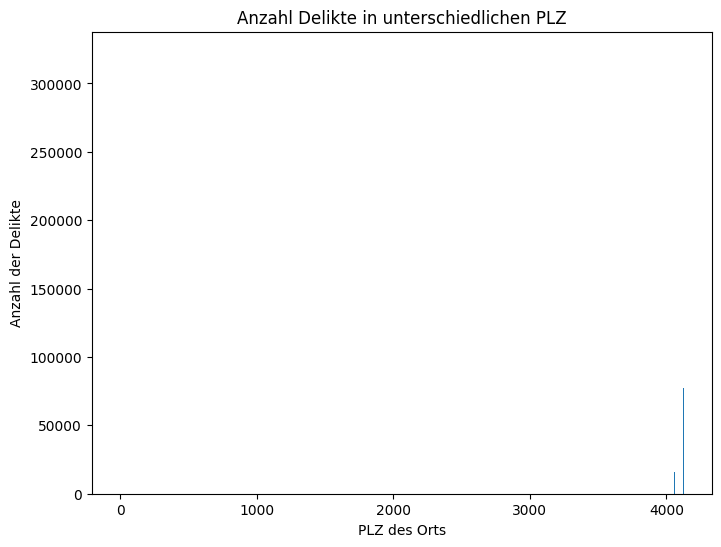

In [77]:
grouped_counts = df.groupby('u_ort_plz')['kategorie_bezeichnung'].value_counts()
print(grouped_counts)

# Reset the index to make the grouped data accessible for plotting
grouped_counts = grouped_counts.reset_index(name='anzahl_delikte')
print(grouped_counts)

# Plot the grouped counts as a bar plot
plt.figure(figsize=(8, 6))
plt.bar(grouped_counts['u_ort_plz'], grouped_counts['anzahl_delikte'])
plt.xlabel('PLZ des Orts')
plt.ylabel('Anzahl der Delikte')
plt.title('Anzahl Delikte in unterschiedlichen PLZ')
plt.show()